# Intensity projections
clEsperanto brings some intensity projections which are also available with numpy. Let's see how numpy performs in comparison with our OpenCL stuff. When doing similar comparisons with ImageJ, we saw more performance benefits when GPU-accelerating 3D operations compared to 2D operations. https://clij.github.io/clij-benchmarking/benchmarking_operations_jmh

**Note:** benchmarking results vary heavily depending on image size, kernel size, used operations, parameters and used hardware. Use this notebook to adapt it to your use-case scenario and benchmark on your target hardware. If you have different scenarios or use-cases, you are very welcome to submit your notebook as pull-request!

In [1]:
import pyclesperanto_prototype as cle
import numpy as np
import time

# to measure kernel execution duration properly, we need to set this flag. It will slow down exection of workflows a bit though
cle.set_wait_for_kernel_finish(True)

# selet a GPU with the following in the name. This will fallback to any other GPU if none with this name is found
cle.select_device('RTX')

<GeForce RTX 2070 on Platform: NVIDIA CUDA (1 refs)>

## Maximum intensity projection in Z

(120, 160, 160)


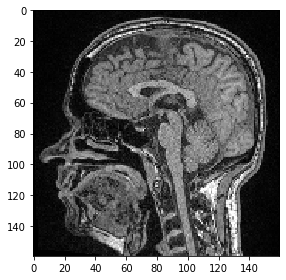

In [2]:
# test data
from skimage.io import imread, imshow

raw_image = imread('../data/Haase_MRT_tfl3d1.tif')

print(raw_image.shape)

# our test data is 3D but we show just a slice for visualisation purposes
imshow(raw_image[60])

Numpy maximum_intensity projection(Z) duration: 0.001994609832763672
Numpy maximum_intensity projection(Z) duration: 0.0025441646575927734
Numpy maximum_intensity projection(Z) duration: 0.002038240432739258
Numpy maximum_intensity projection(Z) duration: 0.001998424530029297
Numpy maximum_intensity projection(Z) duration: 0.0009953975677490234
Numpy maximum_intensity projection(Z) duration: 0.0009555816650390625
Numpy maximum_intensity projection(Z) duration: 0.000997304916381836
Numpy maximum_intensity projection(Z) duration: 0.001994609832763672
Numpy maximum_intensity projection(Z) duration: 0.001995086669921875
Numpy maximum_intensity projection(Z) duration: 0.0019943714141845703


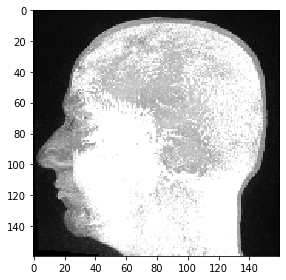

In [3]:
# maximum projection with numpy
result_image = None

test_image = np.asarray(raw_image)

for i in range(0, 10):
    start_time = time.time()
    result_image = np.max(test_image, axis=0, out=result_image)
    print("Numpy maximum_intensity projection(Z) duration: " + str(time.time() - start_time))
    
imshow(result_image)

clEsperanto maximum_intensity projection(Z) duration: 0.04676342010498047
clEsperanto maximum_intensity projection(Z) duration: 0.0
clEsperanto maximum_intensity projection(Z) duration: 0.000997304916381836
clEsperanto maximum_intensity projection(Z) duration: 0.0
clEsperanto maximum_intensity projection(Z) duration: 0.0009970664978027344
clEsperanto maximum_intensity projection(Z) duration: 0.000997781753540039
clEsperanto maximum_intensity projection(Z) duration: 0.0
clEsperanto maximum_intensity projection(Z) duration: 0.0
clEsperanto maximum_intensity projection(Z) duration: 0.0009989738464355469
clEsperanto maximum_intensity projection(Z) duration: 0.0


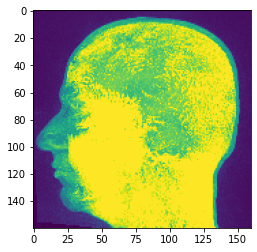

In [4]:
# maximum projection with clesperanto
result_image = None

test_image = cle.push(raw_image)

for i in range(0, 10):
    start_time = time.time()
    result_image = cle.maximum_z_projection(test_image, result_image)
    print("clEsperanto maximum_intensity projection(Z) duration: " + str(time.time() - start_time))

cle.imshow(result_image)

## Maximum intensity projection in X

Numpy maximum_intensity projection(X) duration: 0.0029506683349609375
Numpy maximum_intensity projection(X) duration: 0.003019094467163086
Numpy maximum_intensity projection(X) duration: 0.0030014514923095703
Numpy maximum_intensity projection(X) duration: 0.0019953250885009766
Numpy maximum_intensity projection(X) duration: 0.002954721450805664
Numpy maximum_intensity projection(X) duration: 0.0030410289764404297
Numpy maximum_intensity projection(X) duration: 0.0019903182983398438
Numpy maximum_intensity projection(X) duration: 0.001995563507080078
Numpy maximum_intensity projection(X) duration: 0.002986431121826172
Numpy maximum_intensity projection(X) duration: 0.0019936561584472656


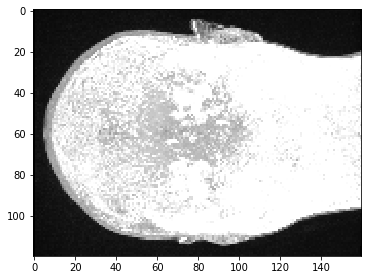

In [5]:
# maximum projection with numpy
result_image = None

test_image = np.asarray(raw_image)

for i in range(0, 10):
    start_time = time.time()
    result_image = np.max(test_image, axis=2, out=result_image)
    print("Numpy maximum_intensity projection(X) duration: " + str(time.time() - start_time))
    
imshow(result_image)

clEsperanto maximum_intensity projection(X) duration: 0.014497041702270508
clEsperanto maximum_intensity projection(X) duration: 0.0010159015655517578
clEsperanto maximum_intensity projection(X) duration: 0.0
clEsperanto maximum_intensity projection(X) duration: 0.0
clEsperanto maximum_intensity projection(X) duration: 0.000997304916381836
clEsperanto maximum_intensity projection(X) duration: 0.0
clEsperanto maximum_intensity projection(X) duration: 0.000997781753540039
clEsperanto maximum_intensity projection(X) duration: 0.0009970664978027344
clEsperanto maximum_intensity projection(X) duration: 0.0
clEsperanto maximum_intensity projection(X) duration: 0.0009970664978027344


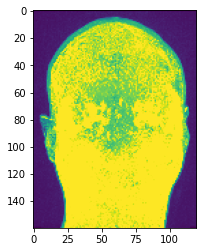

In [6]:
# maximum projection with clesperanto
result_image = None

test_image = cle.push(raw_image)

for i in range(0, 10):
    start_time = time.time()
    result_image = cle.maximum_x_projection(test_image, result_image)
    print("clEsperanto maximum_intensity projection(X) duration: " + str(time.time() - start_time))

cle.imshow(result_image)